# World Happiness Report

## Importing required libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl

In [4]:
happy_df = pd.read_csv('happiness_score_dataset.csv')
happy_df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [37]:
# Change the Overall rank data type to string
happy_df['Happiness Rank'] = happy_df['Happiness Rank'].astype('str')

In [38]:
# Descriptive statistics from quantitative data in the dataframe
happy_df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [39]:
#Check if the world happiness data in 2015 has any missing or null values, using two codes

# check if there are any missing data, if it returns False ---> then there's no missing data
happy_df.isnull().any().any()

False

In [40]:
# checking for any missing data
happy_df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

## relplot

This graph shows the Happines Score increases the more Freedom increase, which means that if the Region has high levels of freedom the people will be happier.
And the values for Happiness Score differs depending on what region we're talking about

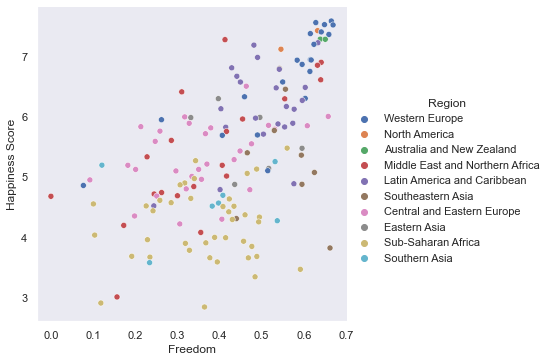

In [41]:
sns.set_theme(style="dark")
sns.relplot(x="Freedom", y="Happiness Score",data=happy_df, hue = 'Region')

## catplot

This graph shows how the happiness score changes changes due to family support in different regions.
I only chose the first 10 rows of the data and based on that, we can see that the situation is different in different regions and based on how involved the family is in the adult's life, whereas the more present and pleasnt the family support is the more the hapiness score increases.

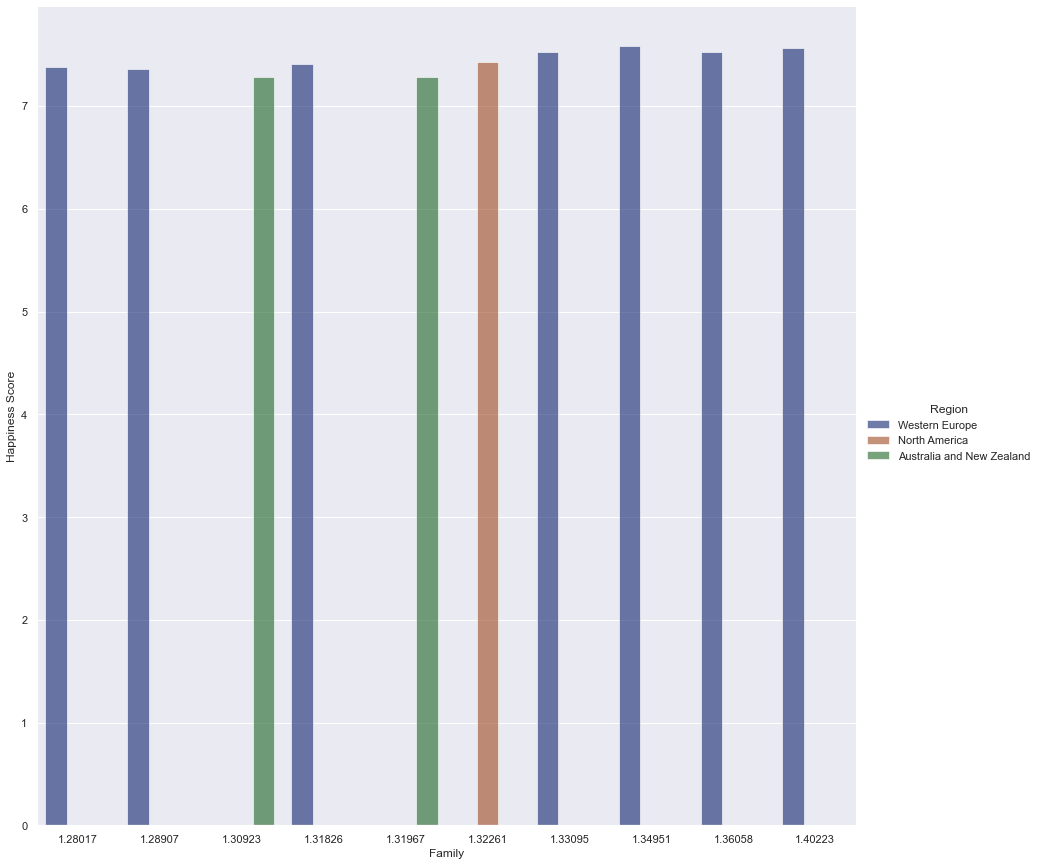

In [42]:
sns.set_theme(style="darkgrid")
family = sns.catplot(
    data=happy_df.head(10), kind="bar",
    x="Family", y="Happiness Score", hue="Region",
    ci="sd", palette="dark", alpha=.6, height=12
)

## catplot

This graph shows how the Happiness Rank changes changes based on health or life expectency.¶
I only chose the first 5 rows of the data and based on that, we can see that the better the health situation is for people the more likely for them to have hight scores ranks of happiness regardless of where they are in the world

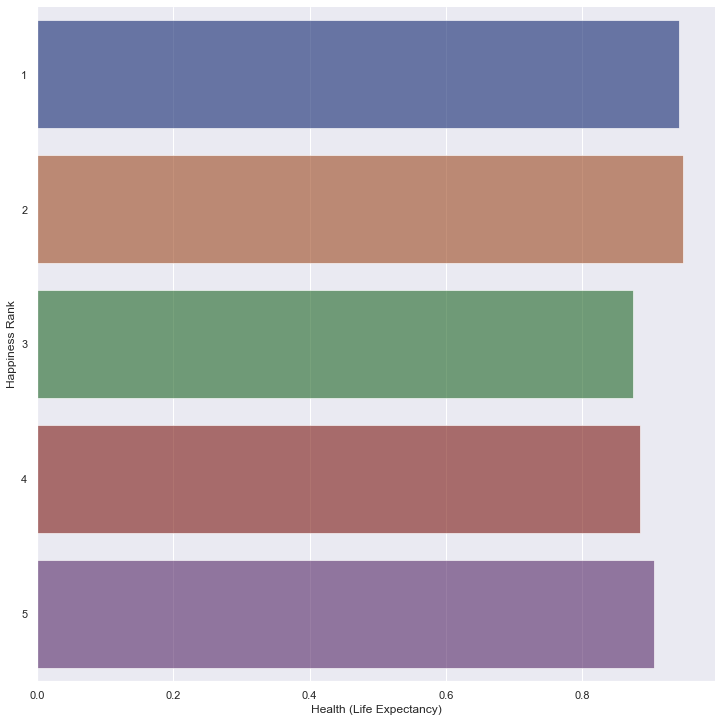

In [43]:
sns.set_theme(style="darkgrid")
health = sns.catplot(
    data=happy_df.head(5), kind="bar",
    x="Health (Life Expectancy)", y="Happiness Rank",
    ci="sd", palette="dark", alpha=.6, height=10
)

## Happiness Variable Box Plot

In [44]:
cols = ['Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity',
       'Trust (Government Corruption)','Dystopia Residual']

# Unpivot or melt the dataframe
df_melt = pd.melt(happy_df, id_vars=['Country','Region'], 
                  value_vars=cols, 
                  var_name='variable', 
                  value_name='point')

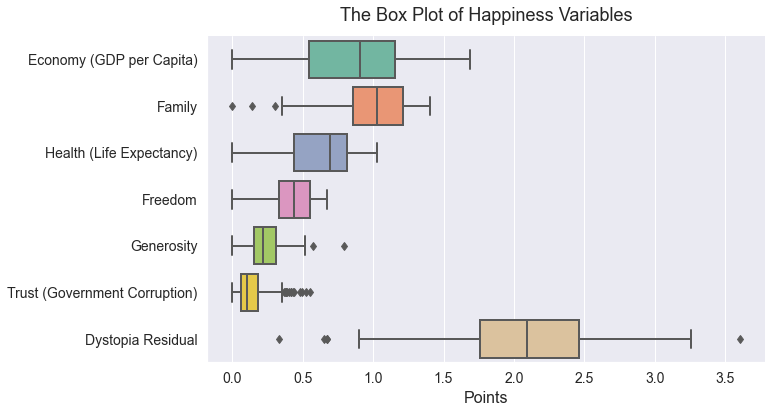

In [45]:
# Set the figure width and height
plt.figure(figsize = (10,6))

# Plot the heatmap of correlation between variables in the dataframe
ax = sns.boxplot(x='point', y='variable', data=df_melt, linewidth=2, fliersize=6, palette='Set2')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title('The Box Plot of Happiness Variables', fontsize = 18, pad=15)
ax.tick_params(labelsize=14)
ax.set_xlabel("Points", fontsize=16, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=14)

# Show the plot
plt.show()

The graph shows that even though some variables have outliers, those outliers are representing a condition of a country. But, the Trust (Government Corruption) variable has the most outliers among all variables. Those outliers represent the countries with high trust in the goverment/business or simply has lower corruption level. This means, that corruption is still a major problem in most of the world.

## How Score Variable Measured?

In [46]:
happy_df["Check"] = happy_df[['Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity',
       'Trust (Government Corruption)','Dystopia Residual']].sum(axis = 1)

happy_df[happy_df['Check'] != happy_df['Happiness Score']].any()

Country                          True
Region                           True
Happiness Rank                   True
Happiness Score                  True
Standard Error                   True
Economy (GDP per Capita)         True
Family                           True
Health (Life Expectancy)         True
Freedom                          True
Trust (Government Corruption)    True
Generosity                       True
Dystopia Residual                True
Check                            True
dtype: bool

In [47]:
happy_df[['Check', 'Happiness Score']].sample(5)

,Check,Happiness Score
65,5.69534,5.695
25,6.75018,6.750
2,7.52708,7.527
55,5.83259,5.833
6,7.37815,7.378


In [48]:
happy_df.drop("Check", axis=1, inplace=True)

## Happiness Score Variable Distribution

As the most crucial part to determine the level of happiness in a country, the Happiness score measurements should get more attention here. First, let's look at how the values are distributed.

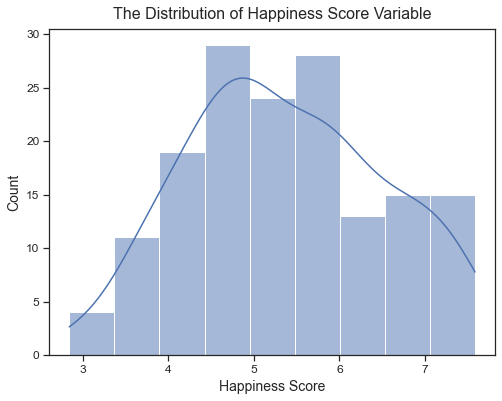

In [49]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Plot the distribution of the score measurement
ax = sns.histplot(happy_df['Happiness Score'], kde=True)

# Set the title, the labels, and custom ticks
plt.title('The Distribution of Happiness Score Variable', fontsize = 16, pad=10)
ax.set_xlabel("Happiness Score", fontsize=14, labelpad=5)
ax.set_ylabel("Count", fontsize=14, labelpad=5)
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

From the visual above, the score variable has quite bell-shaped graph and the values are mostly laid near the mean value, which is <strong>5.37</strong>

In [50]:
# Check the mean, median, mode of the Score variable
score_mean = round(happy_df['Happiness Score'].mean(), 2)
score_median = round(happy_df['Happiness Score'].median(), 2)
score_mode = round(happy_df['Happiness Score'].mode()[0] , 2)

# Print the result
print('Happiness Score variable central tendency calculation')
print('Mean    : {}\nMedian  : {}\nMode    : {}'. format(score_mean, score_median, score_mode))

Happiness Score variable central tendency calculation
Mean    : 5.38
Median  : 5.23
Mode    : 5.19


The central tendency calculation from the Happiness Score variables also shows that the graph would have a bell-shaped curve, and the mean can be used as the central tendency from the variable.

## Correlation Between Happiness Variables

Is it possible from the seven variables that determine the happiness level of a country, that there is a certain variable that highly affects it? Let's find out about it

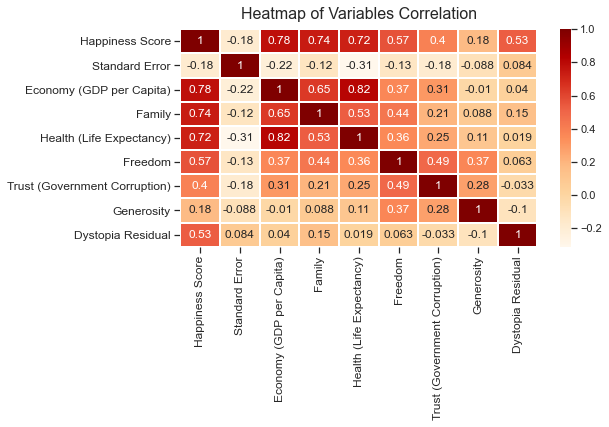

In [51]:
# Get the correlation between variables in the dataframe
corr = happy_df.corr()

# Set the figure width and height
plt.figure(figsize = (8,4))

# Set the color to use for the heatmap
cmap = sns.color_palette("OrRd", as_cmap=True)

# Plot the heatmap of correlation between variables in the dataframe
ax = sns.heatmap(corr, cbar=True, annot=True, annot_kws={"size":12}, cmap=cmap, linewidths=1, linecolor='white')

# Set the title, the labels, and custom ticks
plt.title('Heatmap of Variables Correlation', fontsize = 16, pad=10)
ax.tick_params(labelsize=12)

# Show the plot
plt.show()


It looks like <strong>Economy(GDP per Capita), Family, and Health(Life Expectancy)</strong> have the greatest correlation with the Happiness Score each country made, which are above <strong>0.72</strong>.

## World Happiest Countries

Which countries are belong to the happiest countries based on this data? Let's see the top 10 of them

In [53]:
happy_10 = happy_df[['Country', 'Happiness Score']].head(10)

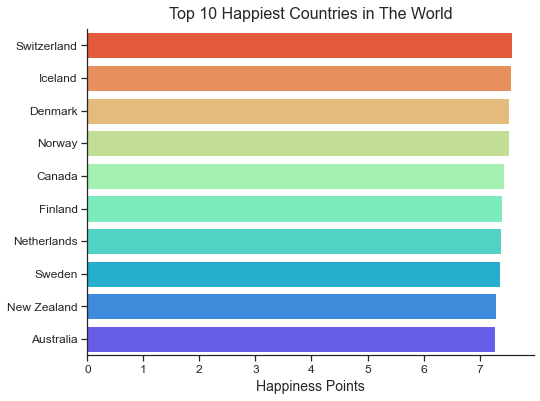

In [56]:
plt.figure(figsize = (8,6)) # Set the figure width and height

# Bar chart showing top 20 countries with highest contribution of GDP per capita on Hapiness level
ax = sns.barplot(x='Happiness Score', y='Country', data=happy_10, palette='rainbow_r')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Happiest Countries in The World", fontsize = 16, pad=10)
ax.set_xlabel("Happiness Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

<strong>Finland, Denmark, Norway, Iceland, and Sweden</strong> that also known as the <strong>Nordic</strong> countries, dominated the list. Let's analyze how Nordic countries were able to secure the top 10 spots. Let's start with finding variables that highly affected their happiness score.

In [57]:
# Create a new dataframe for Nordic countries
country = ['finland', 'denmark', 'norway', 'iceland', 'sweden']
nordic = happy_df[happy_df['Country'].str.lower().isin(country)]
nordic

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119


## GDP per Capita and Happiness

First, let's find the countries with the highest GDP per capita points

In [58]:
# List the top 10 countries with highest GDP per capita points
gdp_10 = happy_df.sort_values(by='Economy (GDP per Capita)', ascending=False)[['Country', 'Economy (GDP per Capita)', 'Happiness Rank']].head(10)

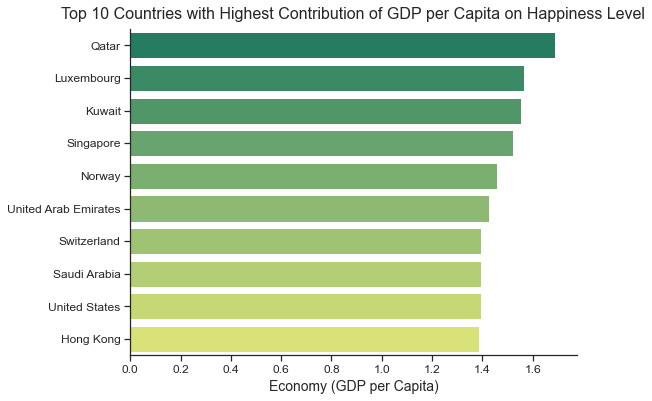

In [60]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Bar chart showing top 10 countries with highest contribution of GDP per capita on happiness level
ax = sns.barplot(x='Economy (GDP per Capita)', y='Country', data=gdp_10, palette='summer')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Countries with Highest Contribution of GDP per Capita on Happiness Level", fontsize = 16, pad=10)
ax.set_xlabel("Economy (GDP per Capita)", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

From the GDP per capita variable, it doesn't look like this is a bigger deal in determining the Nordic countries' happiness level. From this list, only <strong>Norway</strong> is included in this list.

In [61]:
# Check the country that also Nordic countries
gdp_10[gdp_10['Country'].isin(nordic['Country'])].reset_index(drop=True)

,Country,Economy (GDP per Capita),Happiness Rank
0,Norway,1.459,4


Making the list larger reveals other Nordic countries, which are <strong>Norway, Denmark and Sweden</strong>. So, it's clear that Economy (GDP per Capita) is not the main variable of Nordic countries' happiness. But, this does not simply deny the fact that they already have slightly higher GDP per capita than other countries.

In [62]:
# List the top 20 countries with highest GDP per capita points
gdp_20 = happy_df.sort_values(by='Economy (GDP per Capita)', ascending=False).reset_index(drop=True)[['Country', 'Economy (GDP per Capita)', 'Happiness Rank']].head(20)

# Find the position of Nordic countries in the list
gdp_20['Nordic'] = np.where(gdp_20['Country'].isin(nordic['Country']), True, False)
gdp_20

,Country,Economy (GDP per Capita),Happiness Rank,Nordic
0,Qatar,1.69042,28,False
1,Luxembourg,1.56391,17,False
2,Kuwait,1.55422,39,False
3,Singapore,1.52186,24,False
4,Norway,1.45900,4,True
5,United Arab Emirates,1.42727,20,False
6,Switzerland,1.39651,1,False
7,Saudi Arabia,1.39541,35,False
8,United States,1.39451,15,False
9,Hong Kong,1.38604,72,False


## Social Support and Happiness

In [64]:
# List the top 10 countries with highest social support points
social_10 = happy_df.sort_values(by='Family', ascending=False)[['Country', 'Family', 'Happiness Rank']].head(10)

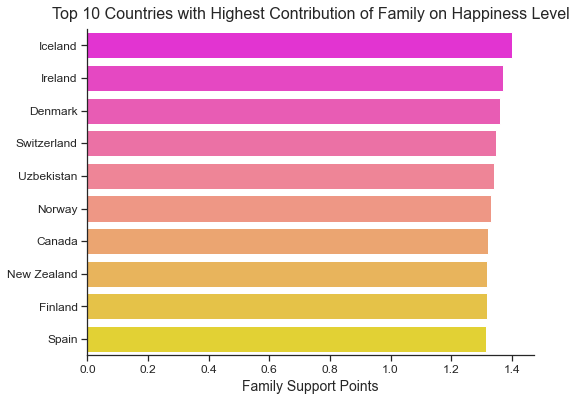

In [65]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Bar chart showing top 10 countries with highest contribution of social support on happiness level
ax = sns.barplot(x='Family', y='Country', data=social_10, palette='spring')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Countries with Highest Contribution of Family on Happiness Level", fontsize = 16, pad=10)
ax.set_xlabel("Family Support Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

In [66]:
# Check the country that also Nordic countries
social_10[social_10['Country'].isin(nordic['Country'])].reset_index(drop=True)

,Country,Family,Happiness Rank
0,Iceland,1.40223,2
1,Denmark,1.36058,3
2,Norway,1.33095,4
3,Finland,1.31826,6


It looks like Family support is the highest contributor to the Nordic countries' overall happiness level. 4/5 Nordic countries have higher Family support points than every country in the world.

## Healthy Life Expectancy and Happiness

In [67]:
# Is high life expectancy make a happy country?
life_10 = happy_df.sort_values(by='Health (Life Expectancy)', ascending=False)[['Country', 'Health (Life Expectancy)', 'Happiness Rank']].head(10)

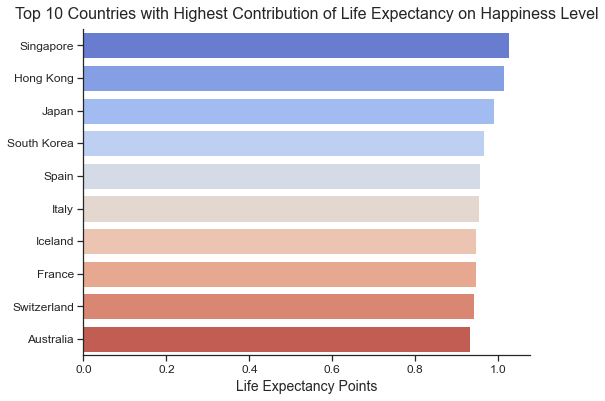

In [68]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Bar chart showing top 10 countries with highest contribution of healthy life expectancy on happiness level
ax = sns.barplot(x='Health (Life Expectancy)', y='Country', data=life_10, palette='coolwarm')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Countries with Highest Contribution of Life Expectancy on Happiness Level", fontsize = 16, pad=10)
ax.set_xlabel("Life Expectancy Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

In [70]:
# Check the country that also Nordic countries
life_10[life_10['Country'].isin(nordic['Country'])].reset_index(drop=True)

,Country,Health (Life Expectancy),Happiness Rank
0,Iceland,0.94784,2


Just like the GDP per capita case, even though these two variables have a great correlation with the score variable, this is not the case for the Nordic countries. Even if the list of countries with the highest contribution of life expectancy score is made to include the top 20 countries, only 2/5 of Nordic countries are on the list.

In [71]:
# List the top 20 countries with highest Healthy life expectancy points
life_20 = happy_df.sort_values(by='Health (Life Expectancy)', ascending=False).reset_index(drop=True)[['Country', 'Health (Life Expectancy)', 'Happiness Rank']].head(20)

# Find the position of Nordic countries in the list
life_20['Nordic'] = np.where(life_20['Country'].isin(nordic['Country']), True, False)
life_20

,Country,Health (Life Expectancy),Happiness Rank,Nordic
0,Singapore,1.02525,24,False
1,Hong Kong,1.01328,72,False
2,Japan,0.99111,46,False
3,South Korea,0.96538,47,False
4,Spain,0.95562,36,False
5,Italy,0.95446,50,False
6,Iceland,0.94784,2,True
7,France,0.94579,29,False
8,Switzerland,0.94143,1,False
9,Australia,0.93156,10,False


Of the three variables, which are Economy (GDP per Capita), Family, and Health (Life Expectancy), that have the greatest correlation to the happiness score, only Family has the highest influence on Nordic countries' overall happiness.

How about the other variables with a lower correlation to the happiness score, which is Freedom to make life choices, Generosity, and Trust (Government Corruption)?

## Freedom to Make Life Choices and Happiness

In [73]:
# List the top 10 countries with highest freedom to make life choices points
freedom_10 = happy_df.sort_values(by='Freedom', ascending=False)[['Country', 'Freedom', 'Happiness Rank']].head(10)

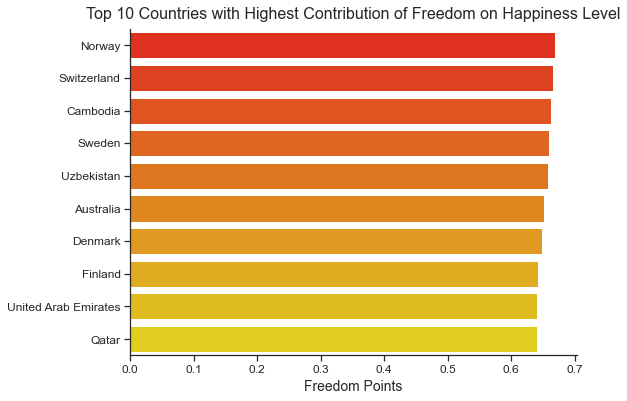

In [74]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Bar chart showing top 10 countries with highest contribution of freedom to make life choices on happiness level
ax = sns.barplot(x='Freedom', y='Country', data=freedom_10, palette='autumn')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Countries with Highest Contribution of Freedom on Happiness Level", fontsize = 16, pad=10)
ax.set_xlabel("Freedom Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

In [75]:
# Check the country that also Nordic countries
freedom_10[freedom_10['Country'].isin(nordic['Country'])].reset_index(drop=True)

,Country,Freedom,Happiness Rank
0,Norway,0.66973,4
1,Sweden,0.65980,8
2,Denmark,0.64938,3
3,Finland,0.64169,6


Even though Freedom has a lower correlation to the happiness score, this variable has a high influence on Nordic countries' happiness scores. This is proved by the fact that every Nordic country is listed in the top 10 countries with the highest freedom score list.

## Generosity and Happiness

In [76]:
# List the top 10 countries with highest generosity points
generosity_10 = happy_df.sort_values(by='Generosity', ascending=False)[['Country', 'Generosity', 'Happiness Rank']].head(10)

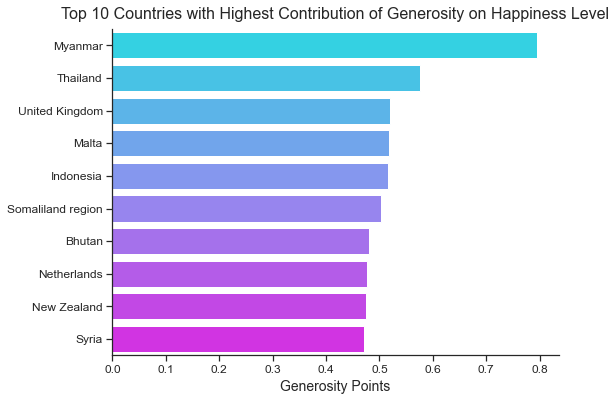

In [77]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Bar chart showing top 10 countries with highest contribution of generosity on happiness level
ax = sns.barplot(x='Generosity', y='Country', data=generosity_10, palette='cool')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Countries with Highest Contribution of Generosity on Happiness Level", fontsize = 16, pad=10)
ax.set_xlabel("Generosity Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()


In [79]:
# Check the country that also Nordic countries
generosity_10[generosity_10['Country'].isin(nordic['Country'])].reset_index(drop=True)

,Country,Generosity,Happiness Rank


Generosity does not have a meaningful meaning in Nordic countries' happiness scores. Even when the list changed to the top 20 countries with the highest Generosity score, still no country that included in it.

In [80]:
# List the top 20 countries with highest generosity points
generosity_20 = happy_df.sort_values(by='Generosity', ascending=False).reset_index(drop=True)[['Country', 'Generosity', 'Happiness Rank']].head(20)

# Find the position of Nordic countries in the list
generosity_20['Nordic'] = np.where(generosity_20['Country'].isin(nordic['Country']), True, False)
generosity_20

,Country,Generosity,Happiness Rank,Nordic
0,Myanmar,0.79588,129,False
1,Thailand,0.57630,34,False
2,United Kingdom,0.51912,21,False
3,Malta,0.51752,37,False
4,Indonesia,0.51535,74,False
5,Somaliland region,0.50318,91,False
6,Bhutan,0.47998,79,False
7,Netherlands,0.47610,7,False
8,New Zealand,0.47501,9,False
9,Syria,0.47179,156,False


## Trust (Government Corruption) and Happiness

In [81]:
# List the top 10 countries with highest perceptions of corruption points
corrupt_10 = happy_df.sort_values(by='Trust (Government Corruption)', ascending=False)[['Country', 'Trust (Government Corruption)', 'Happiness Rank']].head(10)

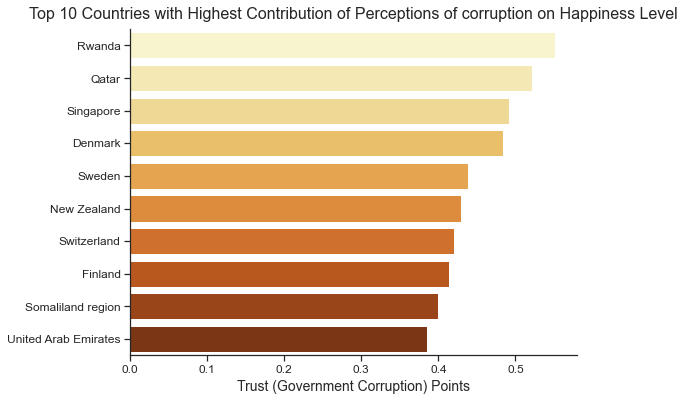

In [82]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Bar chart showing top 10 countries with highest contribution of perceptions of corruption on happiness level
ax = sns.barplot(x='Trust (Government Corruption)', y='Country', data=corrupt_10, palette='YlOrBr')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Countries with Highest Contribution of Perceptions of corruption on Happiness Level", fontsize = 16, pad=10)
ax.set_xlabel("Trust (Government Corruption) Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

In [84]:
# Check the country that also Nordic countries
corrupt_10[corrupt_10['Country'].isin(nordic['Country'])].reset_index(drop=True)

,Country,Trust (Government Corruption),Happiness Rank
0,Denmark,0.48357,3
1,Sweden,0.43844,8
2,Finland,0.41372,6


In [85]:
# List the top 20 countries with highest Perceptions of corruption points
corrupt_20 = happy_df.sort_values(by='Trust (Government Corruption)', ascending=False).reset_index(drop=True)[['Country', 'Trust (Government Corruption)', 'Happiness Rank']].head(20)
# Find the position of Nordic countries in the list
corrupt_20['Nordic'] = np.where(corrupt_20['Country'].isin(nordic['Country']), True, False)

In [91]:
# The Nordic countries average
col = ['Economy (GDP per Capita)',
       'Family', 
       'Health (Life Expectancy)',
       'Freedom', 
       'Generosity',
       'Trust (Government Corruption)']
nordic_df = pd.DataFrame(nordic[col].mean(axis=0))
nordic_df = nordic_df.T    # Transpose the dataframe
nordic_df.insert(0, 'Country', 'Nordic Countries (avg)')

In [92]:
# The world average
world_df = pd.DataFrame(happy_df[col].mean(axis=0))
world_df = world_df.T    # Transpose the dataframe
world_df.insert(0, 'Country', 'World (avg)')

In [93]:
# The world happiness variables average excluding Nordic countries
exclude_nordic = happy_df[~happy_df['Country'].isin(nordic['Country'])].reset_index(drop=True)
exclude_nordic = pd.DataFrame(exclude_nordic[col].mean(axis=0))
exclude_nordic = exclude_nordic.T    # Transpose the dataframe
exclude_nordic.insert(0, 'Country', 'World (Exclude Nordic Countries) (avg)')

In [94]:
# Concate the three dataframe
df_avg = pd.concat([nordic_df, world_df, exclude_nordic], ignore_index=True)
df_avg = pd.melt(df_avg, id_vars=['Country'], value_vars=col)

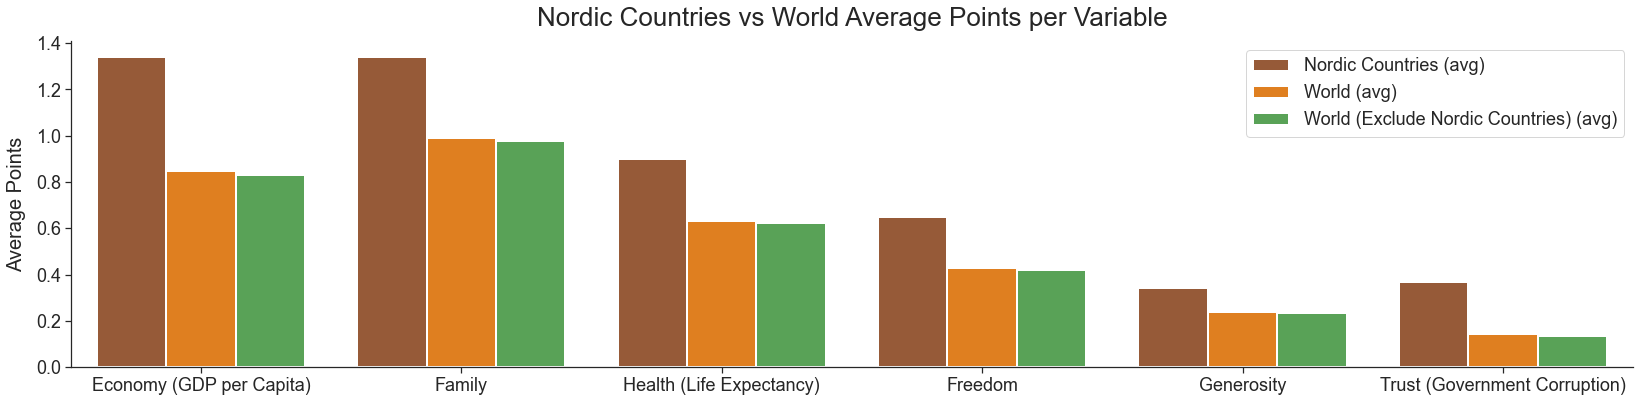

In [95]:
plt.figure(figsize = (28, 6)) # Set the figure width and height

# Bar chart showing overall average Nordic countries and the world
ax = sns.barplot(x="variable", y="value", hue="Country", data=df_avg, 
                 palette='Set1_r',  edgecolor="white", linewidth=2)
# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, the legend, and custom ticks
plt.title("Nordic Countries vs World Average Points per Variable", fontsize = 26, pad=15)
ax.set_xlabel("")
ax.set_ylabel("Average Points", fontsize=20, labelpad=10)
ax.tick_params(labelsize=18)
ax.legend(fontsize=18)
# Show the plot
plt.show()

The Nordic countries have greater average points in every index variable. After all, they dominated the happiness world ranking and must have greater points than the rest of the country. From this graph, the difference between the average generosity points of Nordics and the world is relatively small, which is (0.05) points. This could be because generosity has the weakest correlation with the happiness score, so this variable does not help much with Nordic countries' happiness. Or, because the generosity in the Nordic countries is indeed low, after all, only Iceland has high points in this variable.

# HAPPINESS LEVEL BY COUNTRY MAP

In [97]:
pip install plotly

     ---------------------------------------- 28.8/28.8 MB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [101]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px

fig = px.choropleth(happy_df, locations='Country',
                    locationmode = "country names",
                    color="Happiness Score",
                    hover_name = 'Country',
                    hover_data={'Country':False,
                                'Happiness Rank': True
                               }
                   )
fig.update_layout(width=900, height=400, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()